In [229]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import iqr


In [230]:
df = pd.read_pickle('df.pkl')


In [231]:
df

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,movie_year,first_genre,num_directors,num_authors
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,87,2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,2010,Action & Adventure,1,1
1,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,Nicole Holofcener,8,2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,2010,Comedy,1,1
2,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,46,1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,1997,Comedy,1,1
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",Sidney Lumet,Reginald Rose,16,1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,2001,Classics,1,1
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,16,1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,2003,Action & Adventure,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Zoolander,"Comic actor Ben Stiller co-wrote, directed, an...",PG-13,"Comedy, Special Interest",Ben Stiller,"Drake Sather, John Hamburg, Ben Stiller",103,2001-09-28,2002-03-12,105.0,Paramount Pictures,Fresh,64,137,80.0,2002,Comedy,1,3
16632,Zoom,Former superhero Jack is called back to work t...,PG,"Action & Adventure, Comedy, Kids & Family",Peter Hewitt,"Adam Rifkin, David Berenbaum",33,2006-08-11,2007-09-02,88.0,Sony Pictures Entertainment,Rotten,3,66,33.0,2007,Action & Adventure,1,2
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,50,1981-10-02,2003-05-27,104.0,MCA Universal Home Video,Rotten,56,9,74.0,2003,Drama,1,1
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble",33,1964-06-17,2001-02-02,139.0,Paramount Pictures,Fresh,95,21,91.0,2001,Classics,2,2


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13305 entries, 0 to 16637
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         13305 non-null  object        
 1   movie_info          13305 non-null  object        
 2   rating              13305 non-null  object        
 3   genre               13305 non-null  object        
 4   directors           13305 non-null  object        
 5   writers             13305 non-null  object        
 6   cast                13305 non-null  int64         
 7   in_theaters_date    13305 non-null  datetime64[ns]
 8   on_streaming_date   13305 non-null  datetime64[ns]
 9   runtime_in_minutes  13305 non-null  float64       
 10  studio_name         13305 non-null  object        
 11  tomatometer_status  13305 non-null  object        
 12  tomatometer_rating  13305 non-null  int64         
 13  tomatometer_count   13305 non-null  int64         


In [233]:
df.isnull().sum()

movie_title           0
movie_info            0
rating                0
genre                 0
directors             0
writers               0
cast                  0
in_theaters_date      0
on_streaming_date     0
runtime_in_minutes    0
studio_name           0
tomatometer_status    0
tomatometer_rating    0
tomatometer_count     0
audience_rating       0
movie_year            0
first_genre           0
num_directors         0
num_authors           0
dtype: int64

In [234]:
df.shape

(13305, 19)

In [235]:
from sklearn.preprocessing import OrdinalEncoder
status_order = ['Rotten', 'Fresh', 'Certified Fresh']

encoder = OrdinalEncoder(categories=[status_order])

df['tomatometer_status'] = encoder.fit_transform(df[['tomatometer_status']])


In [236]:
df

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,movie_year,first_genre,num_directors,num_authors
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,87,2010-02-12,2010-06-29,83.0,20th Century Fox,0.0,49,144,53.0,2010,Action & Adventure,1,1
1,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,Nicole Holofcener,8,2010-04-30,2010-10-19,90.0,Sony Pictures Classics,2.0,86,140,64.0,2010,Comedy,1,1
2,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,46,1979-10-05,1997-08-27,118.0,Waner Bros.,1.0,68,22,53.0,1997,Comedy,1,1
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",Sidney Lumet,Reginald Rose,16,1957-04-13,2001-03-06,95.0,Criterion Collection,2.0,100,51,97.0,2001,Classics,1,1
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,16,1954-01-01,2003-05-20,127.0,Disney,1.0,89,27,74.0,2003,Action & Adventure,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Zoolander,"Comic actor Ben Stiller co-wrote, directed, an...",PG-13,"Comedy, Special Interest",Ben Stiller,"Drake Sather, John Hamburg, Ben Stiller",103,2001-09-28,2002-03-12,105.0,Paramount Pictures,1.0,64,137,80.0,2002,Comedy,1,3
16632,Zoom,Former superhero Jack is called back to work t...,PG,"Action & Adventure, Comedy, Kids & Family",Peter Hewitt,"Adam Rifkin, David Berenbaum",33,2006-08-11,2007-09-02,88.0,Sony Pictures Entertainment,0.0,3,66,33.0,2007,Action & Adventure,1,2
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,50,1981-10-02,2003-05-27,104.0,MCA Universal Home Video,0.0,56,9,74.0,2003,Drama,1,1
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble",33,1964-06-17,2001-02-02,139.0,Paramount Pictures,1.0,95,21,91.0,2001,Classics,2,2


In [237]:
df['rating'].shape

(13305,)

In [238]:
target=df['audience_rating'].copy()
df.drop('audience_rating', axis=1, inplace=True)


In [239]:
hist_col = df.select_dtypes('number').columns
hist_col.shape

(8,)

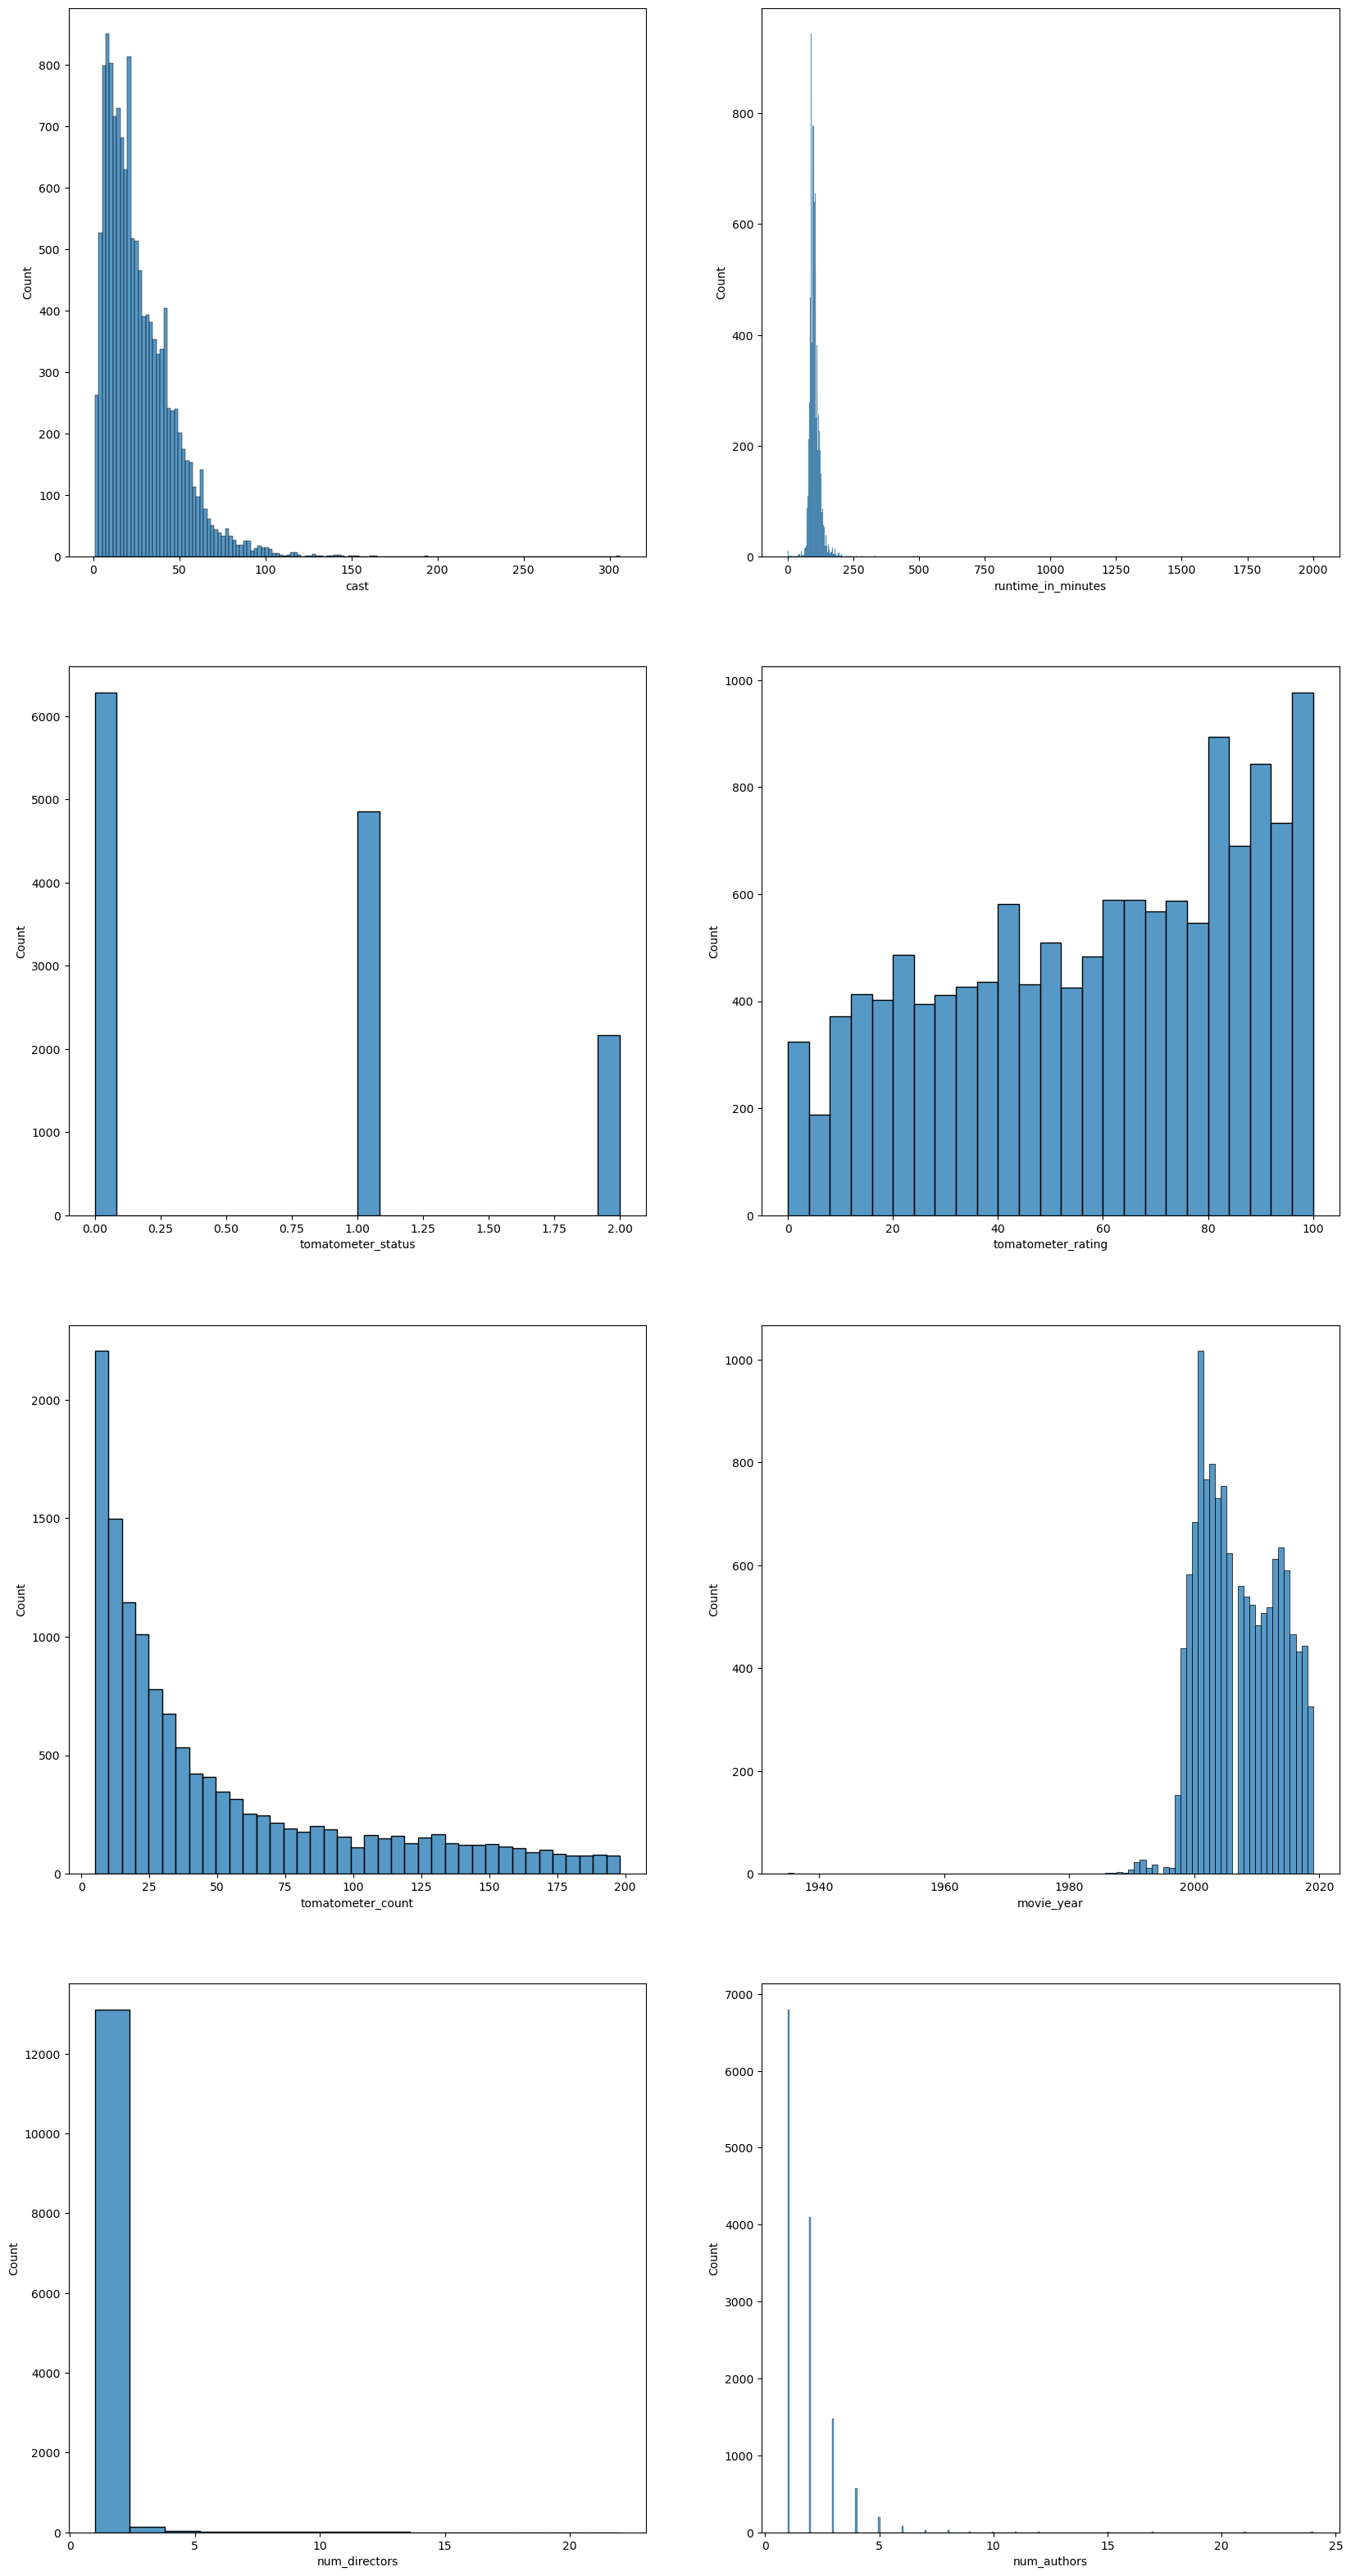

In [240]:
fig, ax = plt.subplots(4, 2, figsize=(20, 40))
ax = ax.flatten()
for index, value in enumerate(hist_col):
    sns.histplot(data=df, x=value, ax=ax[index])

In [241]:
df.skew(numeric_only=True)

cast                   1.694324
runtime_in_minutes    31.889917
tomatometer_status     0.558085
tomatometer_rating    -0.314273
tomatometer_count      1.274535
movie_year             0.032102
num_directors         12.464566
num_authors            3.255909
dtype: float64

In [242]:
skewness_ckeck = (df.skew(numeric_only=True) >= 1) | (df.skew(numeric_only=True) <= -1)
skewed_columns = skewness_ckeck[skewness_ckeck == True].index
skewed_columns

Index(['cast', 'runtime_in_minutes', 'tomatometer_count', 'num_directors',
       'num_authors'],
      dtype='object')

In [243]:
np.seterr(divide = 'ignore')
sk_ = pd.DataFrame(np.select([df[skewed_columns]==0, df[skewed_columns] > 0, df[skewed_columns] < 0], [0, np.log(df[skewed_columns]), np.log(df[skewed_columns])]),columns=skewed_columns).set_index(df.index)
df_skew = df.drop(columns=skewed_columns).set_index(df.index)
df_movies_skew = pd.concat([df_skew,sk_],axis=1)
df_movies_skew = df_movies_skew[df.columns.tolist()]
df_movies_skew

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,movie_year,first_genre,num_directors,num_authors
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,4.465908,2010-02-12,2010-06-29,4.418841,20th Century Fox,0.0,49,4.969813,2010,Action & Adventure,0.000000,0.000000
1,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,Nicole Holofcener,2.079442,2010-04-30,2010-10-19,4.499810,Sony Pictures Classics,2.0,86,4.941642,2010,Comedy,0.000000,0.000000
2,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,3.828641,1979-10-05,1997-08-27,4.770685,Waner Bros.,1.0,68,3.091042,1997,Comedy,0.000000,0.000000
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",Sidney Lumet,Reginald Rose,2.772589,1957-04-13,2001-03-06,4.553877,Criterion Collection,2.0,100,3.931826,2001,Classics,0.000000,0.000000
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,2.772589,1954-01-01,2003-05-20,4.844187,Disney,1.0,89,3.295837,2003,Action & Adventure,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Zoolander,"Comic actor Ben Stiller co-wrote, directed, an...",PG-13,"Comedy, Special Interest",Ben Stiller,"Drake Sather, John Hamburg, Ben Stiller",4.634729,2001-09-28,2002-03-12,4.653960,Paramount Pictures,1.0,64,4.919981,2002,Comedy,0.000000,1.098612
16632,Zoom,Former superhero Jack is called back to work t...,PG,"Action & Adventure, Comedy, Kids & Family",Peter Hewitt,"Adam Rifkin, David Berenbaum",3.496508,2006-08-11,2007-09-02,4.477337,Sony Pictures Entertainment,0.0,3,4.189655,2007,Action & Adventure,0.000000,0.693147
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,3.912023,1981-10-02,2003-05-27,4.644391,MCA Universal Home Video,0.0,56,2.197225,2003,Drama,0.000000,0.000000
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble",3.496508,1964-06-17,2001-02-02,4.934474,Paramount Pictures,1.0,95,3.044522,2001,Classics,0.693147,0.693147


In [244]:
content_rating = pd.get_dummies(df_movies_skew['rating']).astype(int)
content_rating

,G,NC17,NR,PG,PG-13,PG-13),R,R)
0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
16630,0,0,0,0,1,0,0,0
16632,0,0,0,1,0,0,0,0
16633,0,0,0,0,0,0,1,0
16636,0,0,0,1,0,0,0,0


In [245]:
from sklearn.preprocessing import OrdinalEncoder


encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

df['first_genre'] = encoder.fit_transform(df[['first_genre']])

# Check the result
print(df[['first_genre']].head())

   first_genre
0          0.0
1          4.0
2          4.0
3          3.0
4          0.0


In [246]:
df_movies_skew.columns

Index(['movie_title', 'movie_info', 'rating', 'genre', 'directors', 'writers',
       'cast', 'in_theaters_date', 'on_streaming_date', 'runtime_in_minutes',
       'studio_name', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'movie_year', 'first_genre', 'num_directors',
       'num_authors'],
      dtype='object')

In [247]:
df_feature = pd.concat([df_movies_skew[['runtime_in_minutes','tomatometer_status', 'tomatometer_rating', 'tomatometer_count',  'num_directors', 'num_authors']],df[['movie_year','first_genre']], content_rating], axis=1)


In [248]:
df_feature

,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,num_directors,num_authors,movie_year,first_genre,G,NC17,NR,PG,PG-13,PG-13),R,R)
0,4.418841,0.0,49,4.969813,0.000000,0.000000,2010,0.0,0,0,0,1,0,0,0,0
1,4.499810,2.0,86,4.941642,0.000000,0.000000,2010,4.0,0,0,0,0,0,0,1,0
2,4.770685,1.0,68,3.091042,0.000000,0.000000,1997,4.0,0,0,0,0,0,0,1,0
3,4.553877,2.0,100,3.931826,0.000000,0.000000,2001,3.0,0,0,1,0,0,0,0,0
4,4.844187,1.0,89,3.295837,0.000000,0.000000,2003,0.0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16630,4.653960,1.0,64,4.919981,0.000000,1.098612,2002,4.0,0,0,0,0,1,0,0,0
16632,4.477337,0.0,3,4.189655,0.000000,0.693147,2007,0.0,0,0,0,1,0,0,0,0
16633,4.644391,0.0,56,2.197225,0.000000,0.000000,2003,7.0,0,0,0,0,0,0,1,0
16636,4.934474,1.0,95,3.044522,0.693147,0.693147,2001,3.0,0,0,0,1,0,0,0,0


In [249]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_feature_scale = scaler.fit_transform(df_feature)
df_feature_scale


array([[-0.88206815, -0.94012307, -0.31574073, ..., -0.01501766,
        -0.81304901, -0.0086698 ],
       [-0.51245413,  1.78352145,  0.97381835, ..., -0.01501766,
         1.22993816, -0.0086698 ],
       [ 0.7240574 ,  0.42169919,  0.34646529, ..., -0.01501766,
         1.22993816, -0.0086698 ],
       ...,
       [ 0.14754176, -0.94012307, -0.07177009, ..., -0.01501766,
         1.22993816, -0.0086698 ],
       [ 1.47173586,  0.42169919,  1.28749489, ..., -0.01501766,
        -0.81304901, -0.0086698 ],
       [ 0.68520712, -0.94012307, -0.03691714, ..., -0.01501766,
        -0.81304901, -0.0086698 ]])

In [250]:
df_feature.to_pickle('cleaned_df.pkl')
target.to_pickle('target.pkl')